# **Solubility of Molecules**

In [16]:
!cp /content/Solubility.ipynb /content/molecule-solubility/
%cd /content/molecule-solubility
!git add Solubility.ipynb
!git commit -m "Add Solubility.ipynb notebook"
!git push origin main

cp: cannot stat '/content/Solubility.ipynb': No such file or directory
/content/molecule-solubility
fatal: pathspec 'Solubility.ipynb' did not match any files
On branch main

Initial commit

nothing to commit (create/copy files and use "git add" to track)
error: src refspec main does not match any
error: failed to push some refs to 'https://github.com/emaadhasan/molecule-solubility.git'


In [17]:
from google.colab import drive
import os

# Save the current notebook
notebook_name = "Solubility.ipynb"

# Move it from Colab's current session to the repo folder
os.rename("/content/" + notebook_name, "/content/molecule-solubility/" + notebook_name)


FileNotFoundError: [Errno 2] No such file or directory: '/content/Solubility.ipynb' -> '/content/molecule-solubility/Solubility.ipynb'

In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv')
df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


## **Data Separation (X and Y)**


### Data Separation

In [ ]:
y = df['logS']
y

,logS
0,-2.180
1,-2.000
2,-1.740
3,-1.480
4,-3.040
...,...
1139,1.144
1140,-4.925
1141,-3.893
1142,-3.790


In [ ]:
X = df.drop('logS',axis=1)
X

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


### Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

X_train

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
166,5.31380,257.547,1.0,0.800000
97,-0.92640,126.115,0.0,0.666667
714,-0.77160,151.129,0.0,0.818182
328,0.49100,208.217,4.0,0.000000
191,3.60230,207.070,0.0,0.909091
...,...,...,...,...
802,3.00254,250.301,1.0,0.842105
53,2.13860,82.146,3.0,0.000000
350,5.76304,256.348,0.0,0.900000
79,3.89960,186.339,10.0,0.000000


In [ ]:
X_test

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
822,2.91000,172.268,7.0,0.000000
118,7.27400,360.882,1.0,0.666667
347,1.94040,145.161,0.0,0.909091
1123,1.98640,119.378,0.0,0.000000
924,1.70062,108.140,0.0,0.750000
...,...,...,...,...
863,2.65122,266.304,1.0,0.600000
395,4.33190,367.860,7.0,0.285714
1106,3.27520,148.249,1.0,0.545455
374,5.27020,364.914,0.0,0.000000


## **Model Building**

### **Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=-1, positive=False)

lr.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [ ]:
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train,y_lr_train_pred)
lr_train_r2 = r2_score(y_train,y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test,y_lr_test_pred)
lr_test_r2 = r2_score(y_test,y_lr_test_pred)

In [ ]:
lr_results = pd.DataFrame(['Linear Regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method','Training MSE','Training R2','Test MSE', 'Test R2']
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,1.052923,0.759433,0.913488,0.793523


### **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=10, n_jobs=-1, random_state=100, n_estimators=1000)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=1000, n_jobs=-1,
                      random_state=100)

In [ ]:
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

rf_train_mse = mean_squared_error(y_train,y_rf_train_pred)
rf_train_r2 = r2_score(y_train,y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test,y_rf_test_pred)
rf_test_r2 = r2_score(y_test,y_rf_test_pred)

rf_results = pd.DataFrame(['Random Forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method','Training MSE','Training R2','Test MSE', 'Test R2']
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random Forest,0.127548,0.970858,0.596013,0.865282


### **Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbm = GradientBoostingRegressor()
gbm.fit(X_train, y_train)

y_gbm_train_pred = gbm.predict(X_train)
y_gbm_test_pred = gbm.predict(X_test)

gbm_train_mse = mean_squared_error(y_train,y_gbm_train_pred)
gbm_train_r2 = r2_score(y_train,y_gbm_train_pred)

gbm_test_mse = mean_squared_error(y_test,y_gbm_test_pred)
gbm_test_r2 = r2_score(y_test,y_gbm_test_pred)

gbm_results = pd.DataFrame(['Gradient Boosting', gbm_train_mse, gbm_train_r2, gbm_test_mse, gbm_test_r2]).transpose()
gbm_results.columns = ['Method','Training MSE','Training R2','Test MSE', 'Test R2']
gbm_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Gradient Boosting,0.325069,0.92573,0.600578,0.864251


## **Model Comparison**

In [ ]:
df_models = pd.concat((lr_results, rf_results, gbm_results), axis=0)
df_models.reset_index(drop=True)

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,1.052923,0.759433,0.913488,0.793523
1,Random Forest,0.127548,0.970858,0.596013,0.865282
2,Gradient Boosting,0.325069,0.92573,0.600578,0.864251


## **Data Visualization**

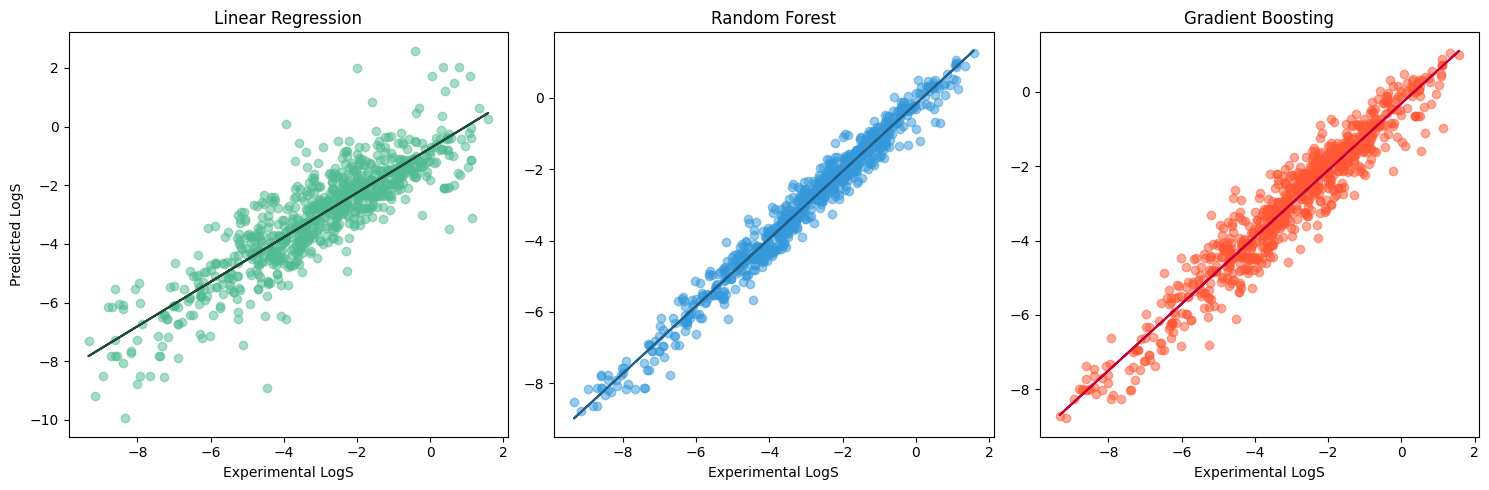

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15,5))

z_lr = np.polyfit(y_train, y_lr_train_pred, 1)
p_lr = np.poly1d(z_lr)

plt.subplot(1, 3, 1)
plt.scatter(x=y_train, y=y_lr_train_pred, c="#51BB93", alpha=0.5)
plt.plot(y_train, p_lr(y_train), c="#204A3A")
plt.ylabel('Predicted LogS')
plt.xlabel('Experimental LogS')
plt.title('Linear Regression')

z_rf = np.polyfit(y_train, y_rf_train_pred, 1)
p_rf = np.poly1d(z_rf)

plt.subplot(1, 3, 2)
plt.scatter(x=y_train, y=y_rf_train_pred, c="#3498DB", alpha=0.5)
plt.plot(y_train, p_rf(y_train), c="#21618C")
plt.xlabel('Experimental LogS')
plt.title('Random Forest')

z_gbm = np.polyfit(y_train, y_gbm_train_pred, 1)
p_gbm = np.poly1d(z_gbm)

plt.subplot(1, 3, 3)
plt.scatter(x=y_train, y=y_gbm_train_pred, c="#FF5733", alpha=0.5)
plt.plot(y_train, p_gbm(y_train), c="#C70039")
plt.xlabel('Experimental LogS')
plt.title('Gradient Boosting')

plt.tight_layout()
plt.show()


<Axes: >

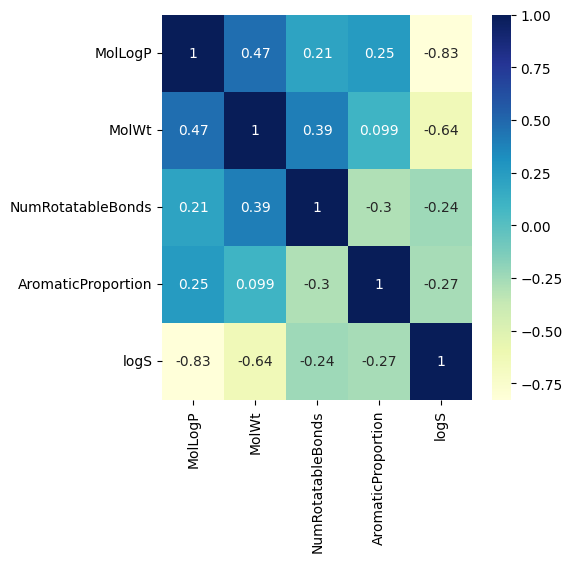

In [ ]:
import seaborn as sns

plt.figure(figsize=(5,5))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')

## **Accuracy**

In [ ]:
lr.score(X_test, y_test)

0.7935230672635001

In [ ]:
rf.score(X_test, y_test)

0.8652824046370651

In [ ]:
gbm.score(X_test, y_test)

0.8642506075929526